In [1]:
import trackpy as tp 
import pims
import glob
import numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import bmc
from tqdm import trange
import os

In [2]:
directory = "../data/onion_4/Onion_bulk_20x/"
path = glob.glob(directory+"/*bmp")

In [3]:
nfiles = len(path)
indices = np.arange(nfiles)+1
files = np.array([], dtype=str)

for i in np.arange(nfiles)+1:
    file_name = glob.glob(directory+"/* %s.bmp"%i)[0]
    files = np.append(files, file_name)

Frame 451: 14 trajectories present.


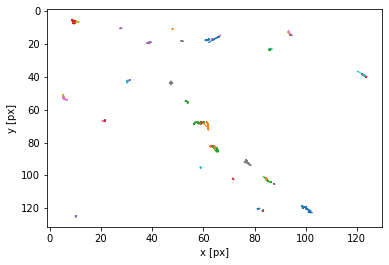

In [5]:
diameter=11
minmass=10
search_range=6
path = directory + "/*.bmp"

f = bmc.annotate(path, show=False, diameter=11, minmass=10)#, crop=((0,26), (27,0)))
t = bmc.get_trajectories(f, show=True, diameter=11, minmass=10, search_range=6, clip_stubs=25)
#plt.savefig("test.pdf")

In [6]:
directories = glob.glob("../data/onion_4/*")

Frame 246: 13 trajectories present.


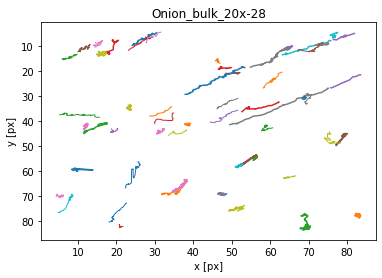

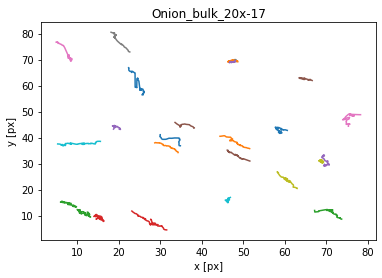

In [35]:
displacements = np.array([])
for dir_path in directories:
    path = dir_path + "/*bmp"
    f = bmc.annotate(path, show=False, diameter=11, minmass=10)#, crop=((0,26), (27,0)))
    t = bmc.get_trajectories(f, show=True, diameter=11, minmass=10, search_range=6, clip_stubs=25)

    outpath = "../data/plots/reduced_plots/"

    plt.figure()
    for i in np.unique(t["particle"]):
        df = t[t["particle"]==i]
        dx = np.diff(df["x"])
        dy = np.diff(df["y"])
        disp = np.sum(np.sqrt(dx**2 + dx**2))
        displacements = np.append(displacements, disp)
        if disp > 5:
            x_traj = df["x"]
            y_traj = df["y"]
            plt.plot(x_traj, y_traj)
        
    plt.title(os.path.basename(dir_path))
    plt.xlabel("x [px]")
    plt.ylabel("y [px]")
    plt.savefig(outpath + os.path.basename(dir_path)+".pdf")

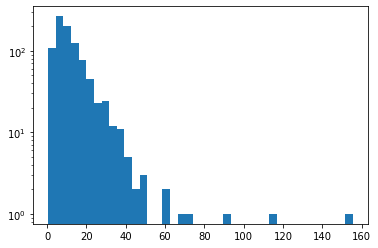

In [41]:
bins = np.linspace(0,2.5)

plt.figure()
_ = plt.hist(displacements,bins=40, log=1)#, bins=bins)#, log=1)

In [42]:
good_traj = ["Onion_bulk_20x-13", "Onion_bulk_20x-17", "Onion_bulk_20x-18", "Onion_bulk_20x-19",
             "Onion_bulk_20x-21", "Onion_bulk_20x-24", "Onion_bulk_20x-25", "Onion_bulk_20x-26",
             "Onion_bulk_20x-28"]

brownian = ["Onion_bulk_20x-6", "Onion_bulk_20x-16", "Onion_bulk_20x-27", "Onion_bulk_20x-29"]

Frame 249: 13 trajectories present.


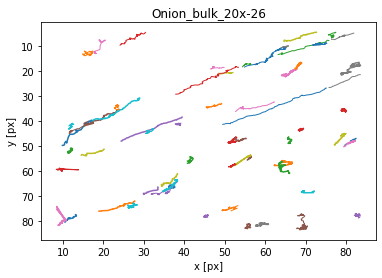

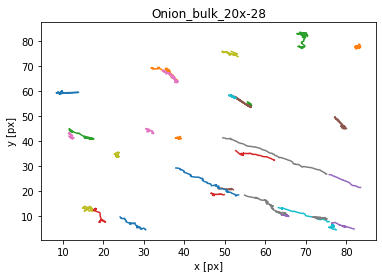

In [43]:
displacements = np.array([])
for dir_path in good_traj:
    path = "../data/onion_4/" + dir_path + "/*bmp"
    f = bmc.annotate(path, show=False, diameter=11, minmass=10)#, crop=((0,26), (27,0)))
    t = bmc.get_trajectories(f, show=True, diameter=11, minmass=10, search_range=6, clip_stubs=25)

    outpath = "../data/plots/best_plots/"

    plt.figure()
    for i in np.unique(t["particle"]):
        df = t[t["particle"]==i]
        dx = np.diff(df["x"])
        dy = np.diff(df["y"])
        disp = np.sum(np.sqrt(dx**2 + dx**2))
        displacements = np.append(displacements, disp)
        if disp > 5:
            x_traj = df["x"]
            y_traj = df["y"]
            plt.plot(x_traj, y_traj)
        
    plt.title(os.path.basename(dir_path))
    plt.xlabel("x [px]")
    plt.ylabel("y [px]")
    plt.savefig(outpath + os.path.basename(dir_path)+".pdf")